In [15]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

In [17]:
language = "python"
path_to_lib = f"data/results/{language}"

In [18]:
with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
    post_to_libs = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
    all_libs_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
    all_pairs_dates = json.load(handle)

Segments formed (took 0.85 seconds).
Fits performed (took 0.61 seconds).
Fit performed; alpha=0.7303213136460464 c=2.00698323699181


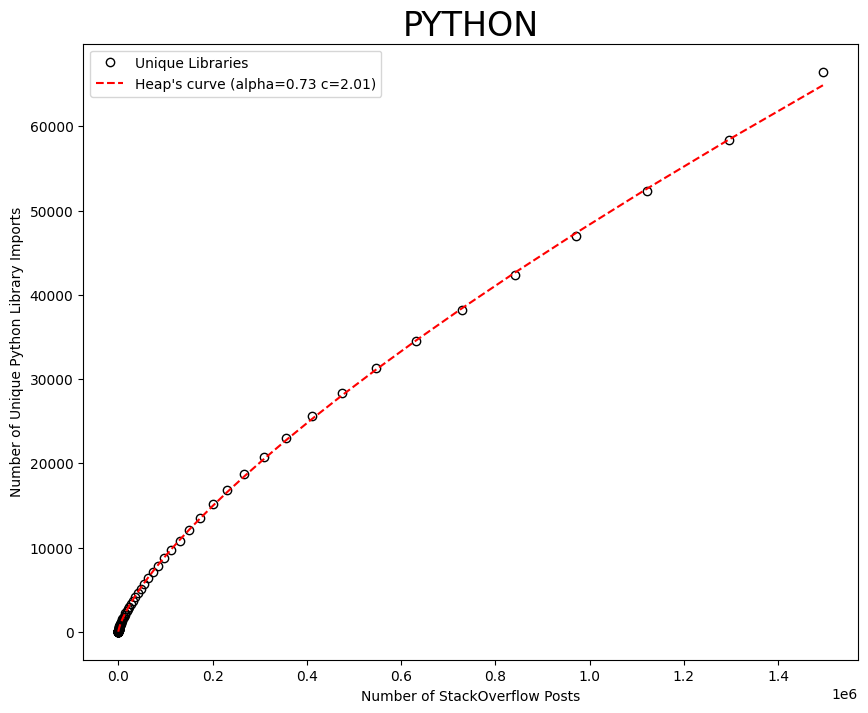

In [19]:
t0 = time.time()
xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
t1 = time.time()
print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")

# Unique libs line fit
libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
t2 = time.time()
print(f"Fits performed (took {round(t2 - t1, 2)} seconds).")

###########################
from sklearn.linear_model import LinearRegression
libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
xs = np.array(range(1, len(libs_count)+1))
xs_transformed = np.log(xs).reshape(-1 ,1 )
counts_transformed = np.log(np.array(libs_count) + 1)

model = LinearRegression()
model.fit(xs_transformed, counts_transformed)

alpha = model.coef_[0]
log_c = model.intercept_
c = np.exp(log_c)
print(f"Fit performed; alpha={alpha} c={c}")
############################


step_size = 1 #len(xs_libs) // 1000
plt.figure(figsize=(10,8))
#xs = np.array(range(0, len(xs_libs), step_size))

xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
#plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Unique Pairs")
plt.plot(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Unique Libraries")
plt.plot(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (alpha={round(alpha, 2)} c={round(c, 2)})")

# plt.xticks(fontsize=12)
plt.title(f"{language.upper()}", fontsize=24)
plt.xlabel("Number of StackOverflow Posts", fontsize=10)
plt.ylabel("Number of Unique Python Library Imports", fontsize=10)
plt.legend()


/tmp/ipykernel_136456/4052940164.py:16: RuntimeWarning: divide by zero encountered in divide
  return k / (rank ** s)
/tmp/ipykernel_136456/4052940164.py:16: RuntimeWarning: overflow encountered in divide
  return k / (rank ** s)


[]

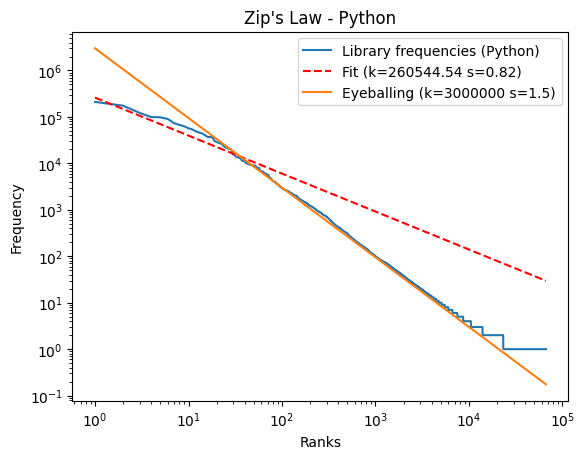

In [20]:
from scipy.optimize import curve_fit

libs_freq = {k:len(v) for k, v in all_libs_dates.items()}
sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

xs = range(1, len(sorted_libs_freq) + 1)
plt.plot(xs, sorted_libs_freq_values, label=f"Library frequencies ({language.capitalize()})")
#plt.loglog()


ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
frequencies = np.array(sorted_libs_freq_values)

def zipf(rank, s, k):
    return k / (rank ** s)

# k / (n ** s)
(s, k), cov = curve_fit(zipf, ranks, frequencies)
fitted_frequencies = zipf(ranks, s, k)
plt.plot(xs, fitted_frequencies, "r--", label=f"Fit (k={round(k, 2)} s={round(s, 2)})")

eye_k = 3_000_000
eye_s = 1.5
plt.plot(xs, [eye_k / (x**eye_s) for x in xs], label=f"Eyeballing (k={eye_k} s={eye_s})")
plt.legend()
plt.xlabel("Ranks")
plt.ylabel("Frequency")
plt.title(f"Zip's Law - {language.capitalize()}")
plt.loglog()

# Subplots depicting all the languages

In [47]:
LANGUAGES = {
    "python": "Python",
    "r" : "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
}

## Heaps's Law

Processing python
	 Opening resources...
	...done.
	Segments formed (took 0.71 seconds).
	Fits performed (took 0.43 seconds).
	Fit performed; alpha=0.7303213136460464 c=2.00698323699181
Processing r
	 Opening resources...
	...done.
	Segments formed (took 0.2 seconds).
	Fits performed (took 0.11 seconds).
	Fit performed; alpha=0.6541387079573763 c=2.4494236537658316
Processing javascript
	 Opening resources...
	...done.
	Segments formed (took 0.12 seconds).
	Fits performed (took 0.07 seconds).
	Fit performed; alpha=0.7695431247608898 c=1.8673919727591108
Processing java
	 Opening resources...
	...done.
	Segments formed (took 0.16 seconds).
	Fits performed (took 0.09 seconds).
	Fit performed; alpha=0.8017736462826618 c=0.25195624954772905
Processing cpp
	 Opening resources...
	...done.
	Segments formed (took 0.04 seconds).
	Fits performed (took 0.01 seconds).
	Fit performed; alpha=0.8758595830396578 c=2.3395191599476526
Processing php
	 Opening resources...
	...done.
	Segments formed (to

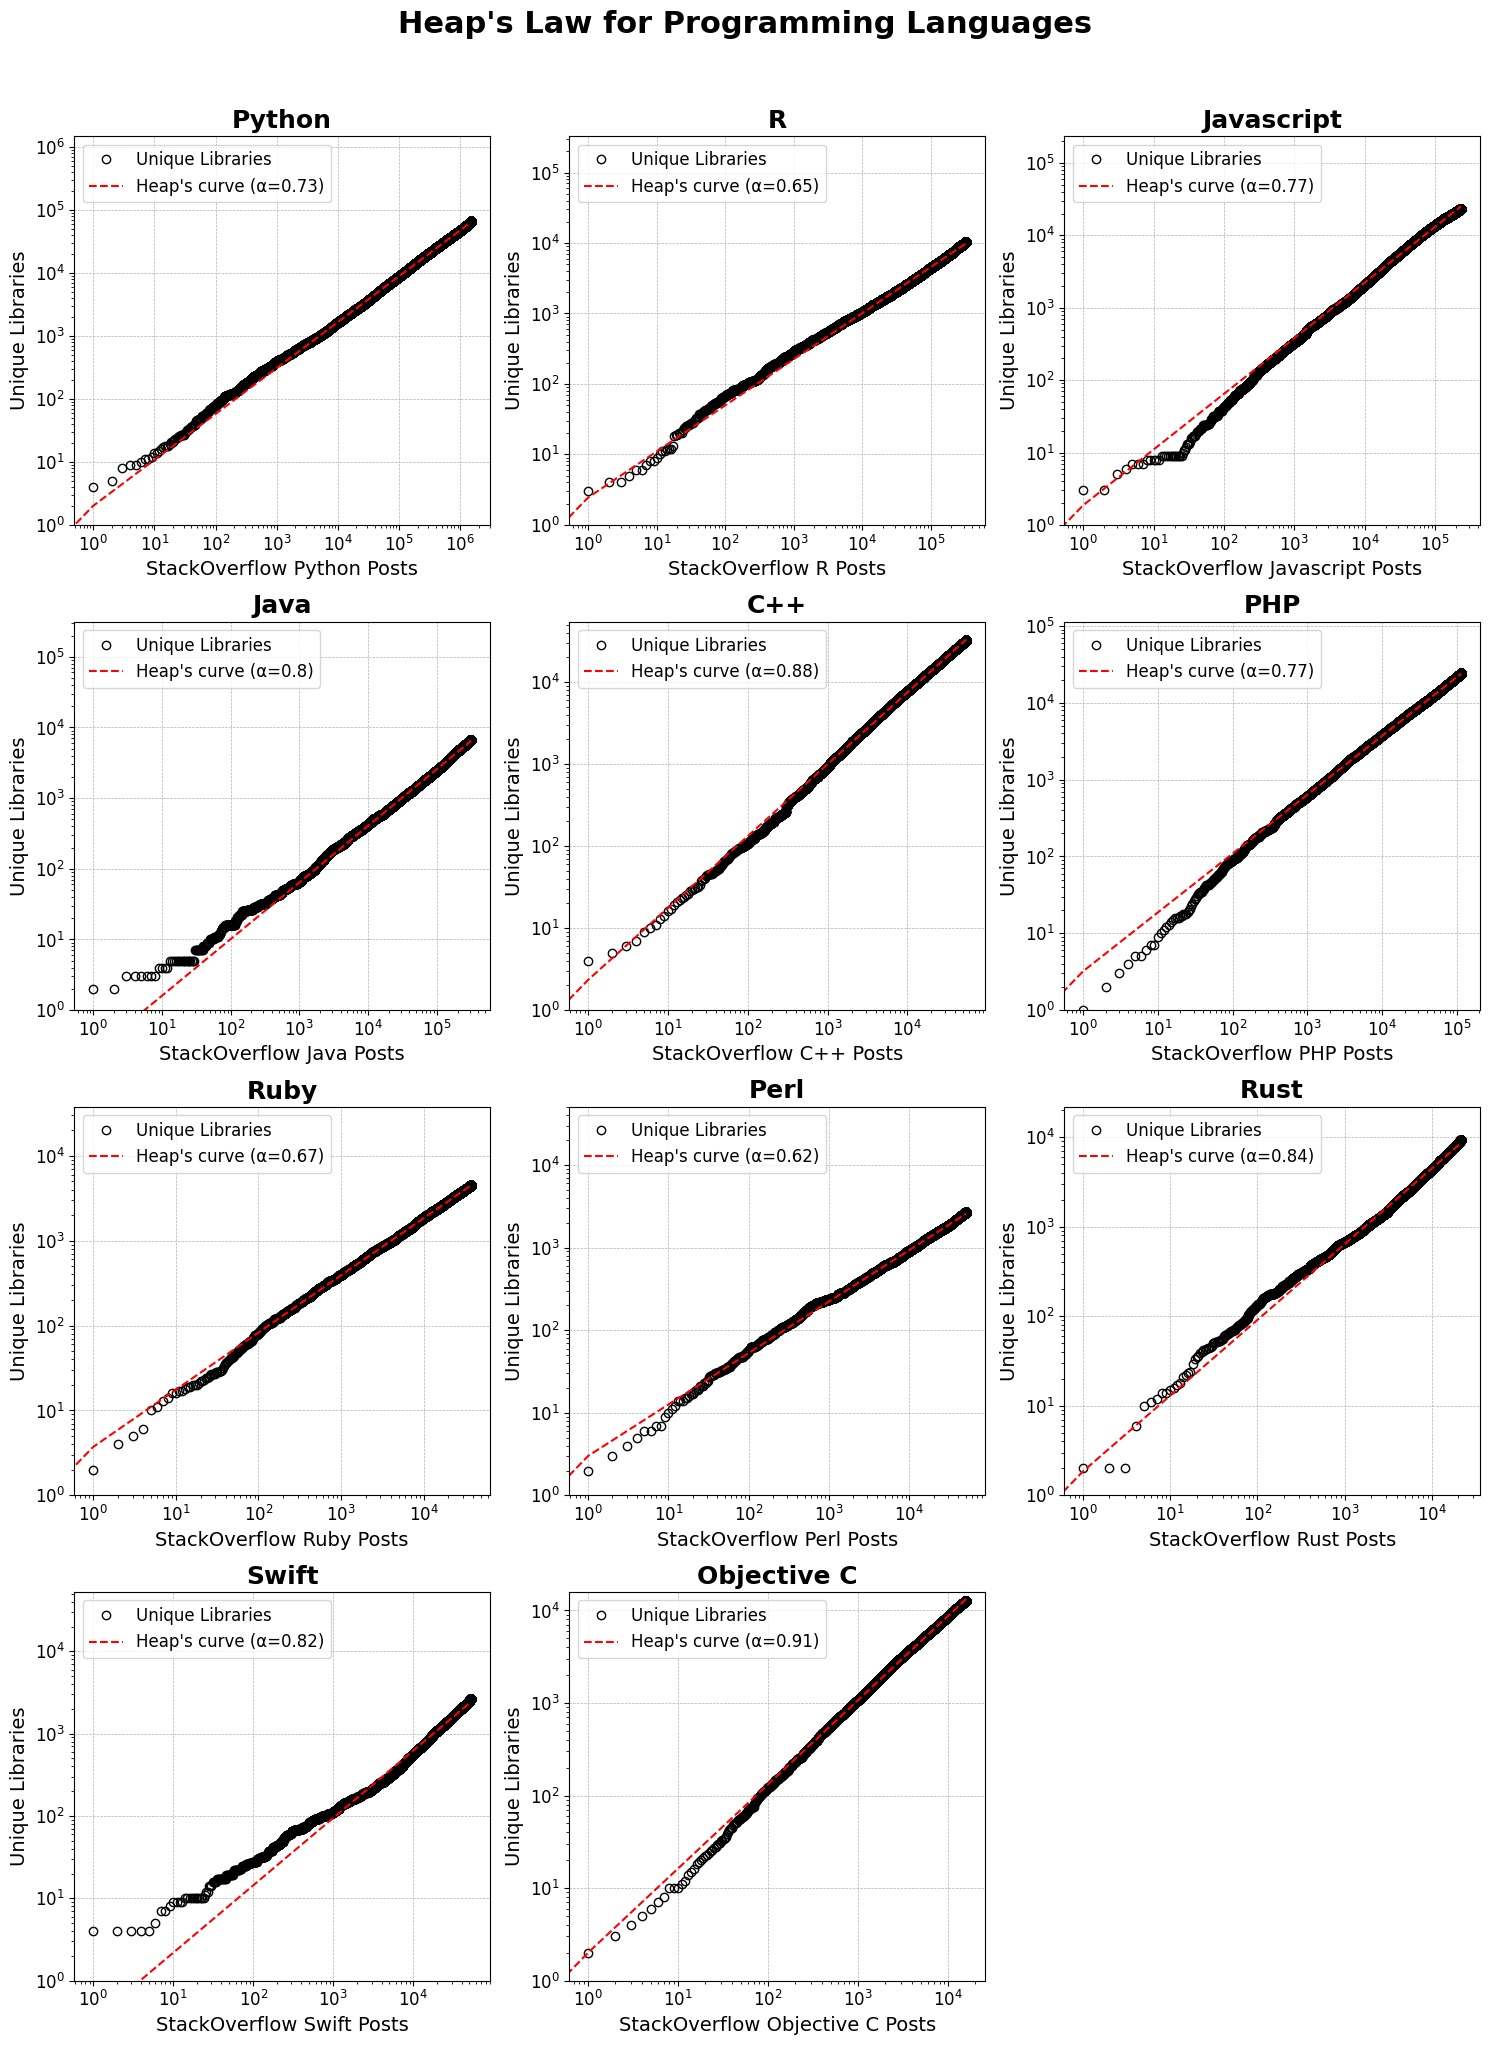

In [62]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import time
from sklearn.linear_model import LinearRegression

%matplotlib inline

square_size = 5
rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(square_size * columns, square_size * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    
    print("\t Opening resources...")
    with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
        post_to_libs = json.load(handle)
    
    with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)
        
    with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)
    print("\t...done.")

    t0 = time.time()
    xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
    ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
    xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
    ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    t1 = time.time()
    print(f"\tSegments formed (took {round(t1 - t0, 2)} seconds).")
    
    # Unique libs line fit
    libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
    pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
    t2 = time.time()
    print(f"\tFits performed (took {round(t2 - t1, 2)} seconds).")
    
    ###########################
    libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
    xs = np.array(range(1, len(libs_count) + 1))
    xs_transformed = np.log(xs).reshape(-1 ,1 )
    counts_transformed = np.log(np.array(libs_count) + 1)
    
    model = LinearRegression()
    model.fit(xs_transformed, counts_transformed)
    
    alpha = model.coef_[0]
    log_c = model.intercept_
    c = np.exp(log_c)
    print(f"\tFit performed; alpha={alpha} c={c}")
    ############################
    
    step_size = 1 #len(xs_libs) // 1000
    xs = list(range(len(xs_libs)))
    
    ax.loglog(xs, [ys_libs[i] for i in xs], "o", color="black", markerfacecolor='none', label="Unique Libraries")
    ax.loglog(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (α={round(alpha, 2)})")
    
    ax.set_ylim(1, len(xs_libs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.legend(fontsize=12, loc="upper left")
    ax.grid(True, which="major", linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(f'StackOverflow {LANGUAGES[language]} Posts', fontsize=14)  # Add an appropriate X-axis label
    ax.set_ylabel('Unique Libraries', fontsize=14)  # Add an appropriate Y-axis label

fig.suptitle("Heap's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Zip's Law

Processing python
Processing r
Processing javascript
Processing java
Processing cpp
Processing php
Processing ruby
Processing perl
Processing rust
Processing swift
Processing objectivec


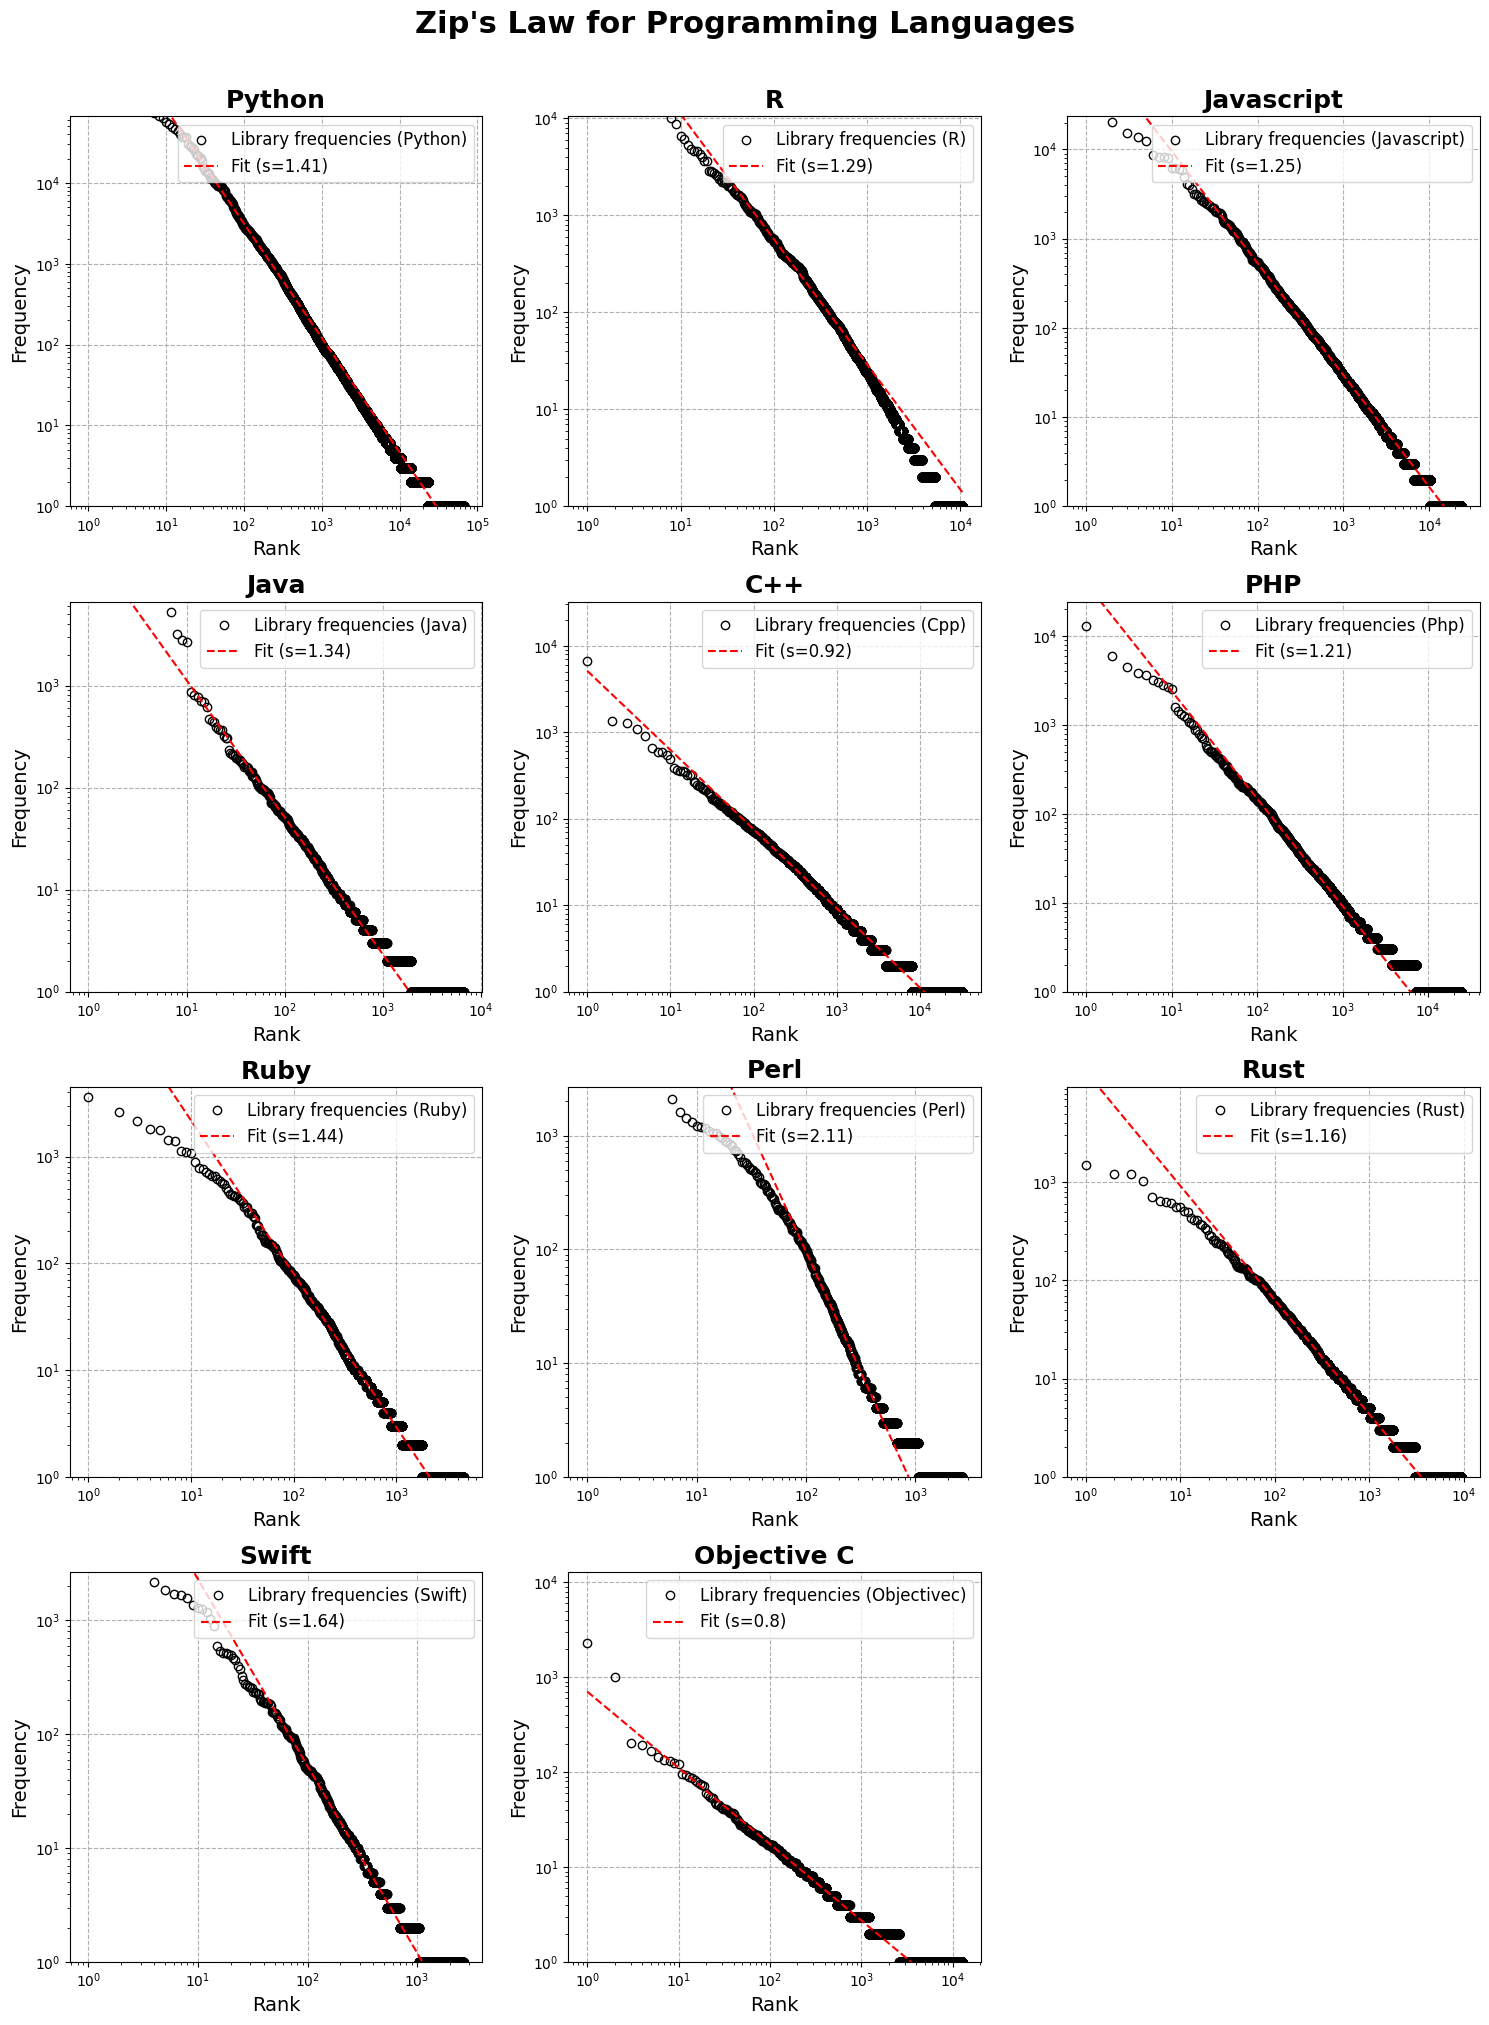

In [58]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit


def read_json(filepath):
    try:
        with open(filepath) as handle:
            return json.load(handle)
    except FileNotFoundError:
        print(f"File {filepath} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file {filepath}.")
        return {}

def plot_language_data(ax, language, path_to_lib):
    print(f"Processing {language}")
    post_to_libs = read_json(f"{path_to_lib}/{language}_post_to_libs.json")
    all_libs_dates = read_json(f"{path_to_lib}/{language}_all_libs_dates.json")
    all_pairs_dates = read_json(f"{path_to_lib}/{language}_all_pairs_dates.json")

    if not all_libs_dates:
        return

    libs_freq = {k: len(v) for k, v in all_libs_dates.items()}
    sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

    xs = range(1, len(sorted_libs_freq) + 1)
    ax.loglog(xs, sorted_libs_freq_values,  "o",
              color="black", markerfacecolor='none',
              label=f"Library frequencies ({language.capitalize()})")

    ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
    frequencies = np.array(sorted_libs_freq_values)

    def zipf(rank, s, k):
        return k / (rank ** s)

    region_start = 100
    region_end = 1000

    if len(ranks) < region_end:
        region_end = len(ranks)

    (s, k), cov = curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )
    fitted_frequencies = zipf(ranks, s, k)
    ax.loglog(xs, fitted_frequencies, "r--", label=f"Fit (s={round(s, 2)})")
    ax.set_ylim(1, len(xs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which="major", ls="--")
    ax.legend(fontsize=12, loc="upper right")

rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(15, 5 * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3) 

for index, language in enumerate(LANGUAGES):
    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    plot_language_data(ax, language, f"data/results/{language}")

fig.suptitle("Zip's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()
